### Exploratory data analysis on the titanic dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data=pd.read_csv('train.csv')

In [6]:
data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### 3. So here we trully begin the data analysis stuff. So the first thing which we need to do is find out the null (nan) values in our dataset , or prominently speaking which columns contain the null values.

#### TO CHECK THE PRESENCE OF NULL VALUE IN THE DATASET

In [7]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


##### So we would now use heatmap in the seaborn library which would help us to vizualize all the null values present in different columns highlighted in different colors as:

<Axes: >

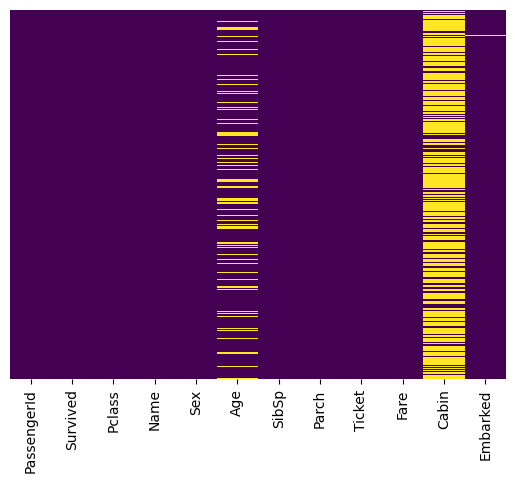

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: ylabel='count'>

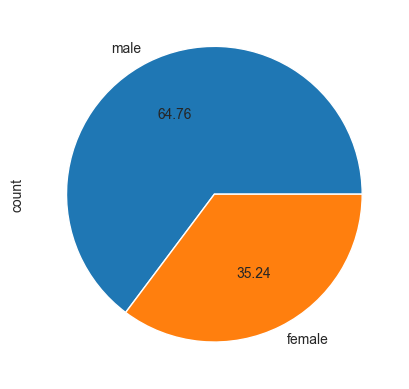

In [31]:
data['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

### the previous diagram is showing the percentage of female and male passengrs travelling

### CHECKING THE DEPENDENCY BETWEEN THE COLUMN 'SURVIVED' AND 'SEX' , 'PCLASS' , 'AGE' , 'CABIN'.

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create a contingency table
contingency_table = pd.crosstab(data['Sex'], data['Survived'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nResults of Chi-Square Test:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Survived    0    1
Sex               
female     81  233
male      468  109

Results of Chi-Square Test:
Chi-Square Statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of Freedom: 1
Expected Frequencies:
[[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


### As our p-value is less than 0.05, so we can say that the people who the survival of people are affected by Sex

<Axes: xlabel='Survived', ylabel='count'>

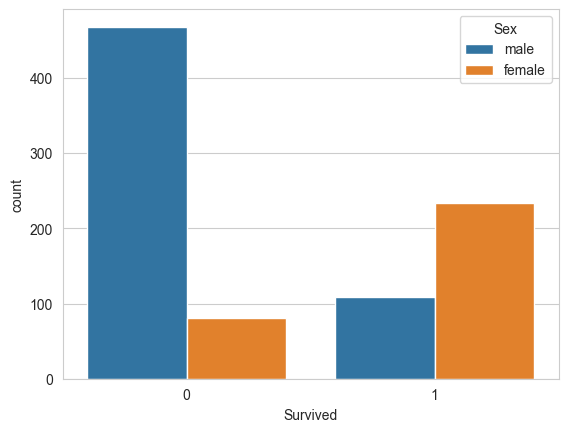

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data)

##### form the previous plot we can say that more males died  than female passengers .
####  on the other hand more females survived than male passengers 

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create a contingency table
contingency_table = pd.crosstab(data['Pclass'], data['Survived'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nResults of Chi-Square Test:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

Results of Chi-Square Test:
Chi-Square Statistic: 102.88898875696056
p-value: 4.549251711298793e-23
Degrees of Freedom: 2
Expected Frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


### As our p-value is less than 0.05. we can say that people who survived are affected by their P-class

<Axes: xlabel='Survived', ylabel='count'>

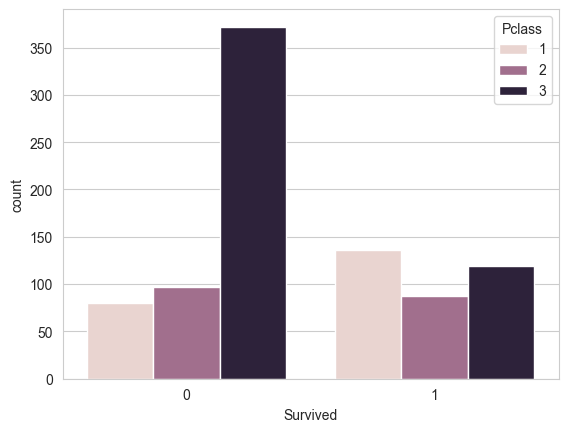

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data)

### People  from class  3 has a greatest count of  death .
### On the other hand people from first class were rescued mostly.

In [15]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create a contingency table
contingency_table = pd.crosstab(data['Age'], data['Survived'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nResults of Chi-Square Test:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  2
0.83      0  2
0.92      0  1
...      .. ..
70.00     2  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[88 rows x 2 columns]

Results of Chi-Square Test:
Chi-Square Statistic: 104.15604988902831
p-value: 0.1014111101886096
Degrees of Freedom: 87
Expected Frequencies:
[[ 0.59383754  0.40616246]
 [ 0.59383754  0.40616246]
 [ 1.18767507  0.81232493]
 [ 1.18767507  0.81232493]
 [ 0.59383754  0.40616246]
 [ 4.15686275  2.84313725]
 [ 5.93837535  4.06162465]
 [ 3.56302521  2.43697479]
 [ 5.93837535  4.06162465]
 [ 2.37535014  1.62464986]
 [ 1.78151261  1.21848739]
 [ 1.78151261  1.21848739]
 [ 2.37535014  1.62464986]
 [ 4.75070028  3.24929972]
 [ 1.18767507  0.81232493]
 [ 2.37535014  1.62464986]
 [ 0.59383754  0.40616246]
 [ 1.18767507  0.81232493]
 [ 3.56302521  2.43697479]
 [ 0.59383754  0.40616246]
 [ 2.96918768  2.03081232]
 [10.0952381   6.9047619 ]
 [ 7.71988796  5.28011204]

As our p-value is less than 0.05. we can say that people who survived are affected by their Age

<Axes: ylabel='Frequency'>

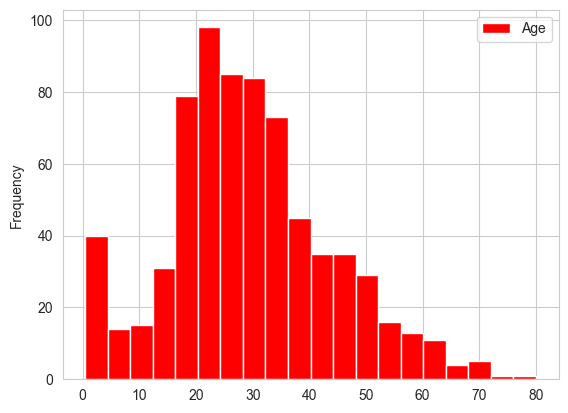

In [28]:
data.plot(kind = "hist",y = "Age",bins = 20,color = "red")

In [17]:
import pandas as pd
from scipy.stats import chi2_contingency



# Create a contingency table
contingency_table = pd.crosstab(data['Cabin'], data['Survived'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the chi-square test
print("\nResults of Chi-Square Test:")
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)


Contingency Table:
Survived  0  1
Cabin         
A10       1  0
A14       1  0
A16       0  1
A19       1  0
A20       0  1
...      .. ..
F33       0  3
F38       1  0
F4        0  2
G6        2  2
T         1  0

[147 rows x 2 columns]

Results of Chi-Square Test:
Chi-Square Statistic: 161.25
p-value: 0.18357354976388165
Degrees of Freedom: 146
Expected Frequencies:
[[0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.66666667 1.33333333]
 [0.33333333 0.66666667]
 [0.66666667 1.33333333]
 [0.66666667 1.33333333]
 [0.66666667 1.33333333]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]
 [0.66666667 1.33333333]
 [0.

As our p-value is greater than 0.05. we can say that Choosing Cabin has no impact on the survival

##### COUNTPLOT FOR PEOPLE WHO SURVIVED AND WHO DID'NT

<Axes: xlabel='Survived', ylabel='count'>

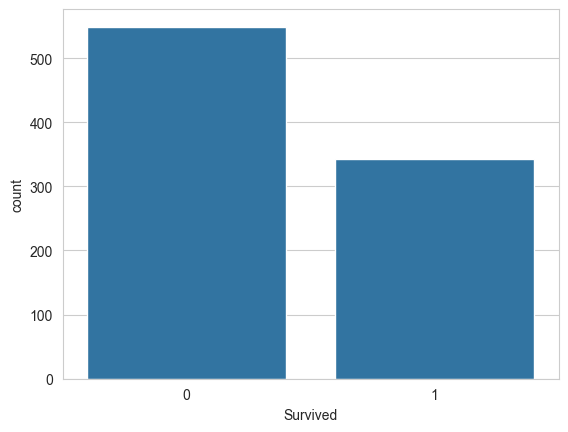

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

##### So we see that more number of people were deceased in this incident

#####  Next we are going to analyze another important thing which is the count of siblings and spouse of every registered passenger as it would help us to find the number of people who had survived and we do it as:

<AxesSubplot:xlabel='SibSp', ylabel='count'>

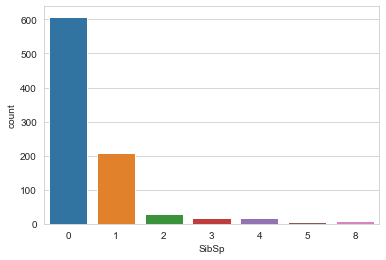

In [59]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=data)

##### So we can make another interesting observation that most of the passengers travelling did not have any child or spouse and quite a few of them had only 1 either a child or spouse.

### Now we will analyze the distribution of the fare payed by different passengers in the form of histograms which would give us the count of values in each range

C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_21336\1962036501.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Fare'],kde=False,bins=10)


<Axes: xlabel='Fare'>

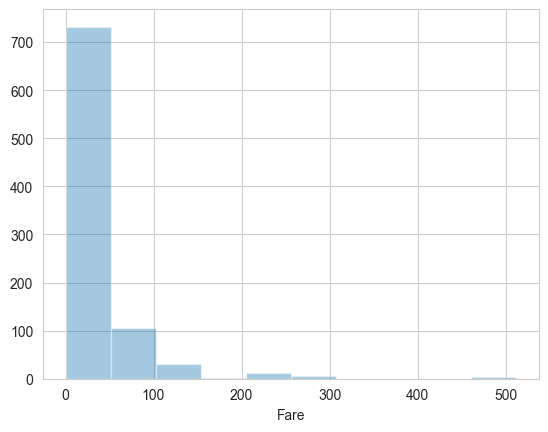

In [29]:
sns.set_style('whitegrid')
sns.distplot(data['Fare'],kde=False,bins=10)

#### f. And lastly we are going to analyze the age of all the passengers in the form of histograms by dropping the null values & also observe the distribution of 'Age'.

C:\Users\SUKANNA DAS\AppData\Local\Temp\ipykernel_21336\2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

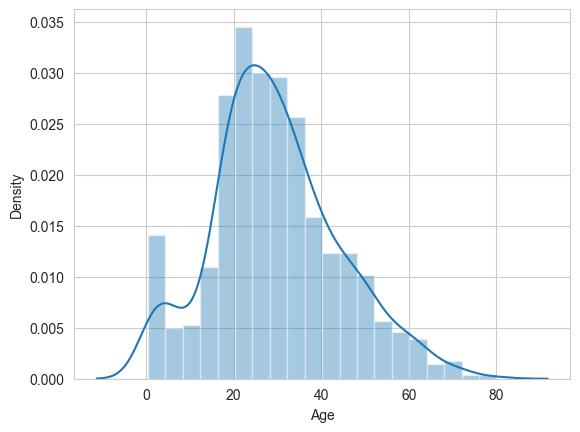

In [20]:
sns.distplot(data['Age'])

#### So we can observe here that the Age column follows roughly a normal distribution and that most of the passengers were between the age range: 19-40

<Axes: ylabel='Age'>

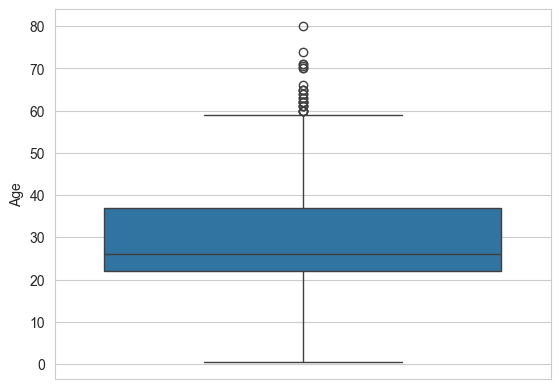

In [46]:
sns.boxplot(data['Age'])

#### So we can observe here that the Age column follows roughly a normal distribution and that most of the passengers were between the age range: 19-40

In [47]:

data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.219046,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.190858,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


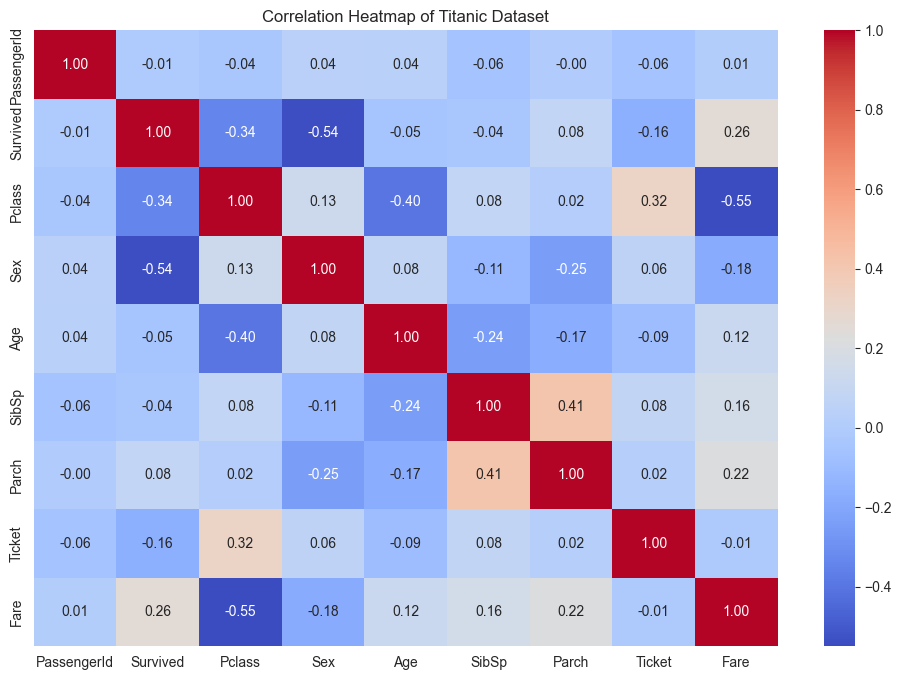

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame
data_encoded = data.drop(columns=[ 'Embarked'])

# Convert categorical columns to numeric using label encoding
label_encoder = LabelEncoder()
for column in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[column] = label_encoder.fit_transform(data[column])

# Calculate the correlation matrix
corr_matrix = data_encoded.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title and show plot
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()


## REPLACING THE MISSING VALUES FOR 'AGE' COLUMN

In [62]:
from sklearn.linear_model import LinearRegression

# Create a DataFrame with non-missing values of 'Age' as training data
training_data = data_encoded.dropna(subset=['Age'])

# Prepare features and target variable
X_train = training_data.drop(columns=['Age'])
y_train = training_data['Age']

# Fit a model to predict missing values
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
data.loc[data_encoded['Age'].isnull(), 'Age'] = model.predict(data_encoded.drop(columns=['Age']))
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [63]:

missing_values_count = data_encoded['Age'].isnull().sum()

# Print the number of missing values
print("Number of missing values in the column:", missing_values_count)


Number of missing values in the column: 0


#### b. So here we find that Age and Pclass are highly correlated with eachother so we can use the Pclass feature to find the missing Age values. So what we do is we divide our data based on Pclass values anf for each Pclass group we first visualize the distribution of ages using boxplot and then from the 50 percentile we find the mean age of all the groups and assingn this mean age values as to the null values.

<Axes: xlabel='Pclass', ylabel='Age'>

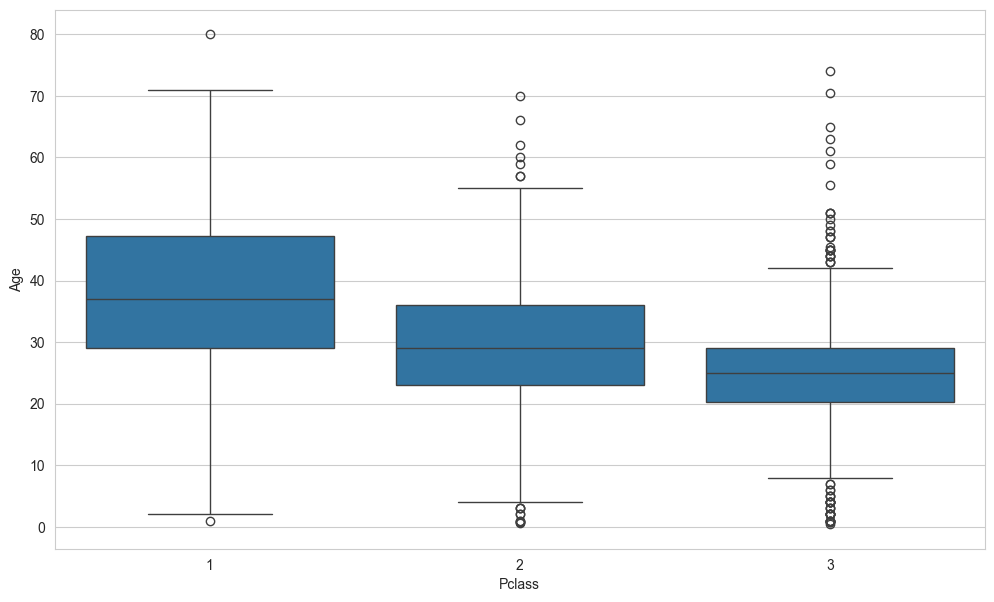

In [48]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.boxplot(x='Pclass',y='Age',data=data)

#### So here we can see from this boxplots that the mean age of Pclass==1 is around 37, for Pclass==2 it is around 29 and for Pclass==3 it is 25.